In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('data/Lionel Messi Goals.csv')
data.head()

,Date,Competition Name,Home team,Opponent,Away team,Minute,Score Home Team - When Messi Scored,Score Away Team - When Messi Scored,Goal Type,Goal Method,Final Game Result
0,samedi 16 f�vrier 2019,Liga,FC Barcelona,Real Valladolid,Real Valladolid,43,1,0,Penalty,Left foot,Won
1,dimanche 13 janvier 2019,Liga,FC Barcelona,Eibar,Eibar,53,2,0,Field goal,Left foot,Won
2,samedi 22 d�cembre 2018,Liga,FC Barcelona,Celta de Vigo,Celta de Vigo,45,2,0,Field goal,Left foot,Won
3,samedi 20 octobre 2018,Liga,FC Barcelona,Sevilla,Sevilla,12,2,0,Field goal,Left foot,Won
4,dimanche 23 septembre 2018,Liga,FC Barcelona,Girona,Girona,19,1,0,Field goal,Left foot,Draw


In [ ]:
data['Date'] =data['Date'] .to_numpy(str)

date_list = []
for date in data['Date'] :
    date_list.append( date[-4:])
    
data['Date'] = date_list

data.head(5)


In [ ]:
plt.figure(figsize=(12,6))
plt.bar(df['Date'],df['count'])
plt.xlabel('Date')
plt.ylabel('Total Goal')
for i in range(len(df)):
    plt.text(i,df['count'][i],df['count'][i])
plt.grid()
plt.label("222")
plt.show()

Did Messi take most of the penalties with his left foot or with his right foot? Display on the chart


In [ ]:
data.rename(columns = {'Goal Type':'GoalType'}, inplace = True)
df=data.query('GoalType=="Penalty"')
df=df['Goal Method'].value_counts().reset_index()
df.loc[1]=['Right foot',0]
df

,Goal Method,count
0,Left foot,82
1,Right foot,0


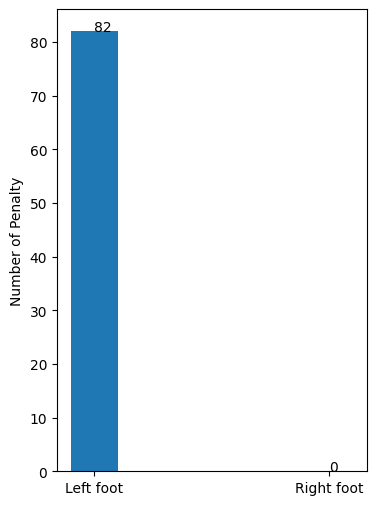

In [ ]:

plt.figure(figsize=(4,6))
plt.bar(df['Goal Method'],df['count'],width = 0.2)
for i in range(len(df)):
    plt.text(i,df['count'][i],df['count'][i])
plt.ylabel('Number of Penalty')
plt.show()

What percentage of games in which Messi has scored in extra time have ended in victory?


In [ ]:
data["Minute"]=data["Minute"].apply(eval)
data["Minute"]=data["Minute"].astype(int)
df=data.query('Minute>89')
df=df['Final Game Result'].value_counts().reset_index()
df.head()

,Final Game Result,count
0,Won,35
1,Draw,3
2,Lost,2


In [ ]:

df2=df.loc[df['Final Game Result'] == 'Won', 'count'].iloc[0]/df['count'].sum()
df['Percent']=df['count']/df['count'].sum()
print(f'percentage of games that messi team won when messis goal is in extra time: {df2}')
df.head()


percentage of games that messi team won when messis goal is in extra time: 0.875


,Final Game Result,count,Percent
0,Won,35,0.875
1,Draw,3,0.075
2,Lost,2,0.050


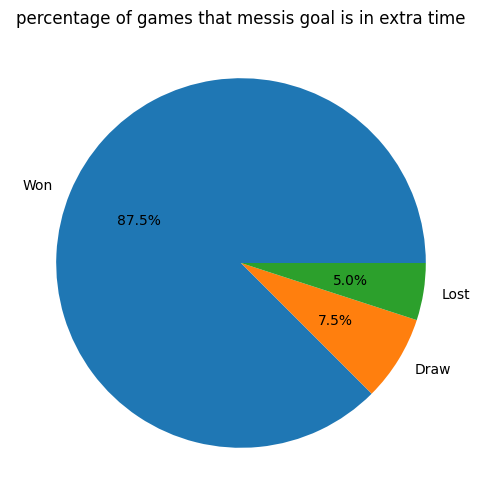

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(df['Percent'],labels=df['Final Game Result'],autopct='%1.1f%%')
plt.title("percentage of games that messis goal is in extra time")
plt.show()

What percentage of Messi's goals have been draws?


In [ ]:
data.head()
data.rename(columns = {'Home team':'Hometeam','Away team':'Awayteam','Score Away Team - When Messi Scored':'ScoreAwayTeamWhenMessiScored','Score Home Team - When Messi Scored':'ScoreHomeTeamWhenMessiScored'}, inplace = True)
equal_goal=np.where(data.ScoreHomeTeamWhenMessiScored ==  data.ScoreAwayTeamWhenMessiScored )

percent_goal=np.size(equal_goal)/len(data)
percent_goal=round(percent_goal, 3)
print(f'Percent of equal goal of messi: {percent_goal*100}%')


Percent of equal goal of messi: 8.6%
